In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset from a CSV file and create a DataFrame
wines = pd.read_csv('winequality-red.csv')

In [3]:
# Display the first few rows of the dataset
print(wines.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
# Generate summary statistics for the 'wines' DataFrame
wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
# Check for null values in the dataset
are_null_values_present = wines.isnull().any().any()
if are_null_values_present:
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


In [6]:
# Group the 'wines' DataFrame by the 'pH' column
grouped_data = wines.groupby("pH")
mean_pH_group = grouped_data.mean()
count_pH_group = grouped_data.size()

print(mean_pH_group)
print(count_pH_group)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
pH                                                                              
2.74           9.20            0.5200        1.000           3.400     0.6100   
2.86          14.30            0.3100        0.740           1.800     0.0750   
2.87           9.20            0.7550        0.180           2.200     0.1480   
2.88          11.30            0.5000        0.415           1.800     0.0780   
2.89           9.35            0.3050        0.380           1.550     0.0775   
...             ...               ...          ...             ...        ...   
3.75           5.00            1.0200        0.040           1.400     0.0450   
3.78           5.30            0.5325        0.135           2.075     0.0860   
3.85           4.70            0.6000        0.170           2.300     0.0580   
3.90           4.85            0.4950        0.085           1.700     0.0440   
4.01           5.20         

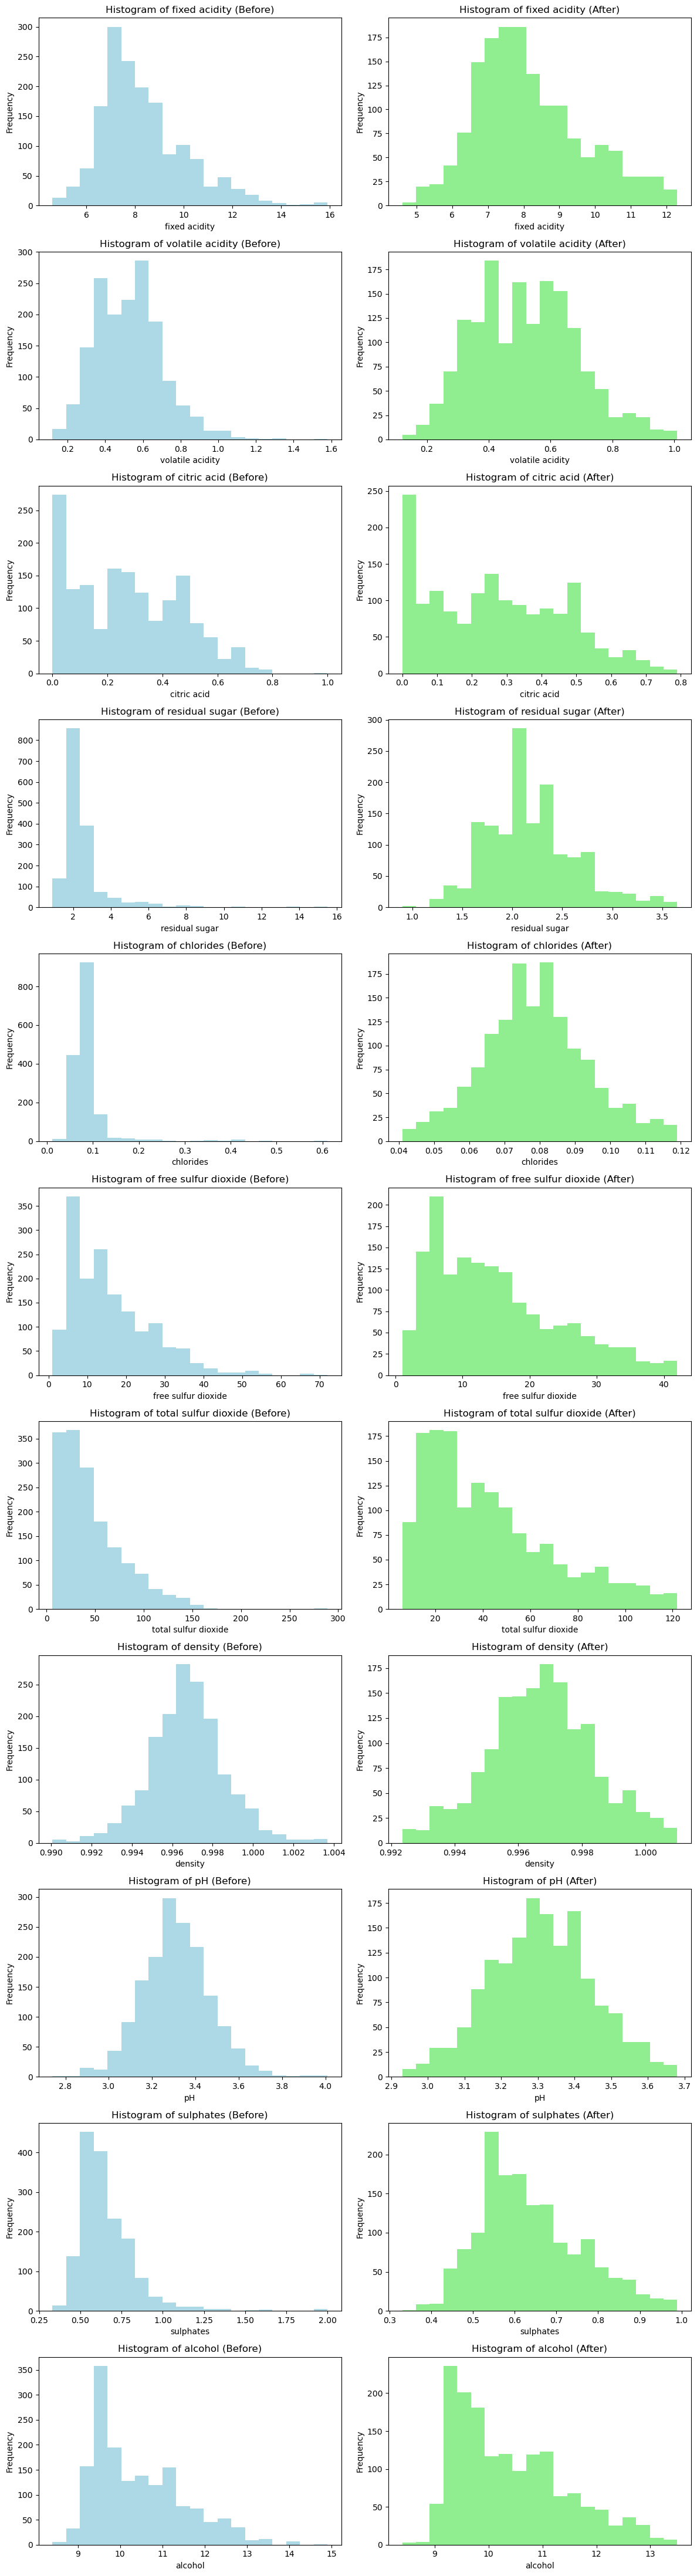

In [7]:
# Define a function to remove outliers for a specific column
def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data_cleaned

# Get a list of all numeric column names (excluding the target 'quality' column)
numeric_columns = wines.select_dtypes(include=['float64']).columns.tolist()

# Create a figure with subplots for each feature
fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(12, 4 * len(numeric_columns)))

for i, column_name in enumerate(numeric_columns):
    # Plot histograms for the feature before outlier removal
    axes[i, 0].hist(wines[column_name], bins=20, color='lightblue')
    axes[i, 0].set_title(f'Histogram of {column_name} (Before)')
    axes[i, 0].set_xlabel(column_name)
    axes[i, 0].set_ylabel('Frequency')

    # Remove outliers for the specified column
    wines_cleaned = remove_outliers(wines, column_name)

    # Plot histograms for the feature after outlier removal
    axes[i, 1].hist(wines_cleaned[column_name], bins=20, color='lightgreen')
    axes[i, 1].set_title(f'Histogram of {column_name} (After)')
    axes[i, 1].set_xlabel(column_name)
    axes[i, 1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [8]:
# Remove the 'quality' column from the 'wines' DataFrame
wines = wines.drop(columns=['quality'])
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [9]:
# List of numeric features
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
                    'pH', 'sulphates', 'alcohol']

In [10]:
wines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

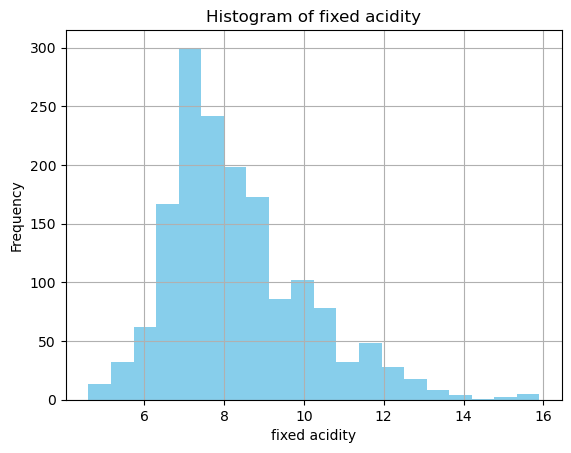

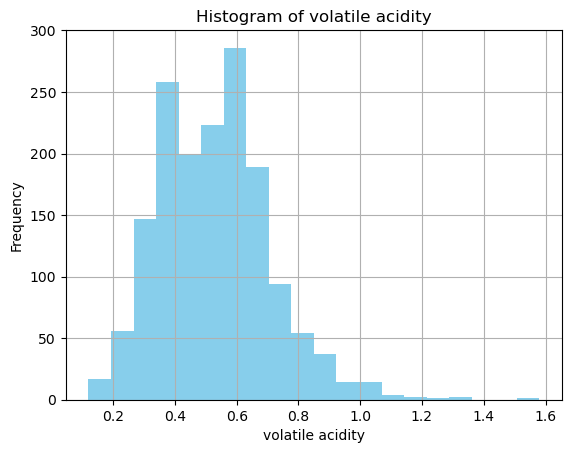

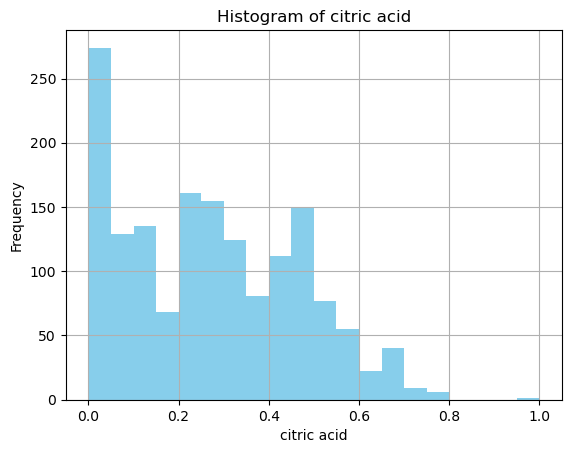

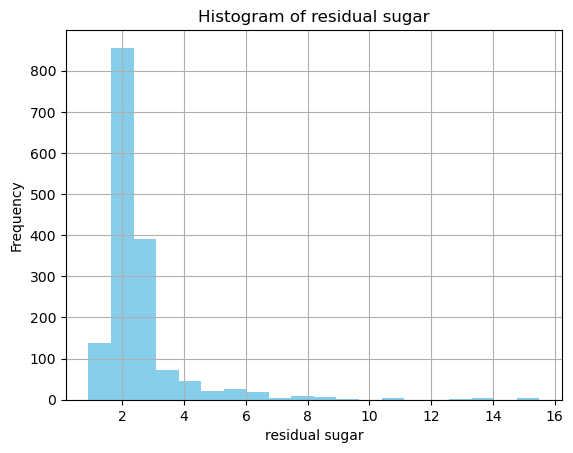

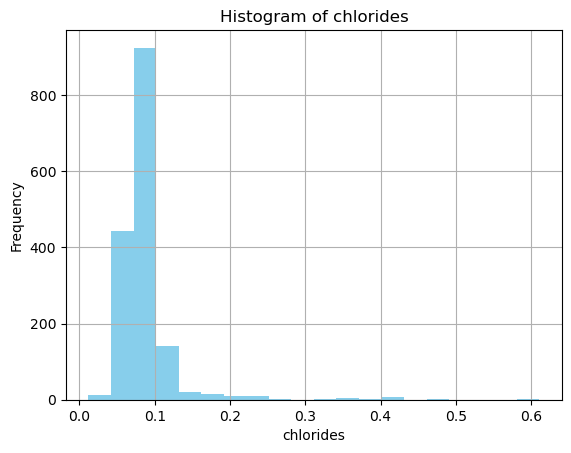

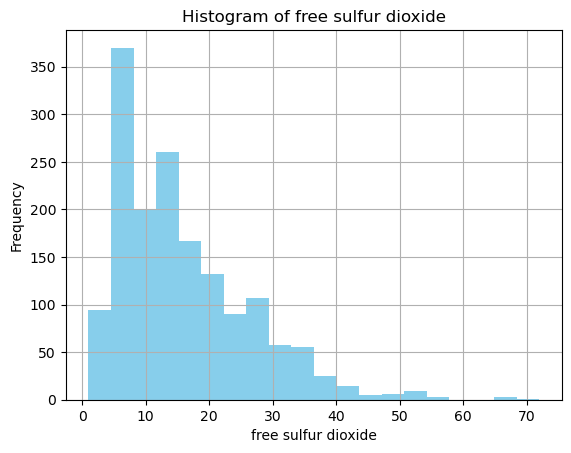

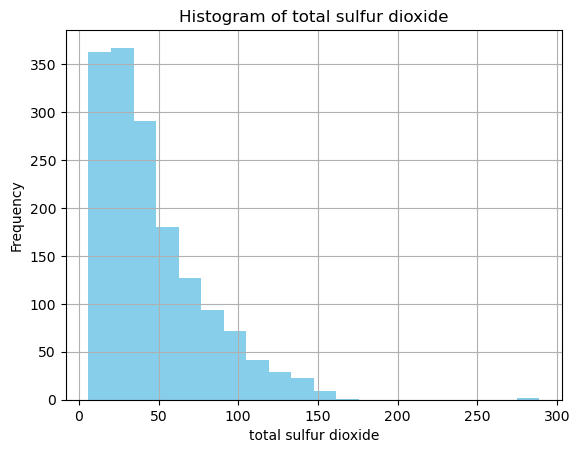

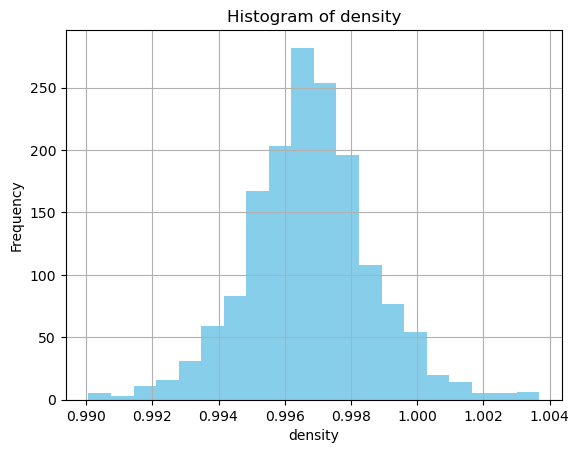

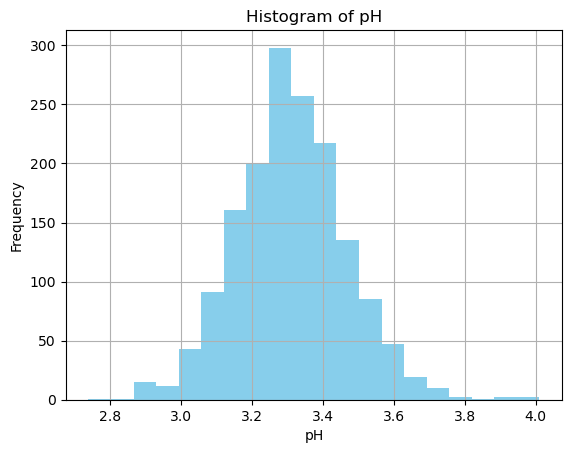

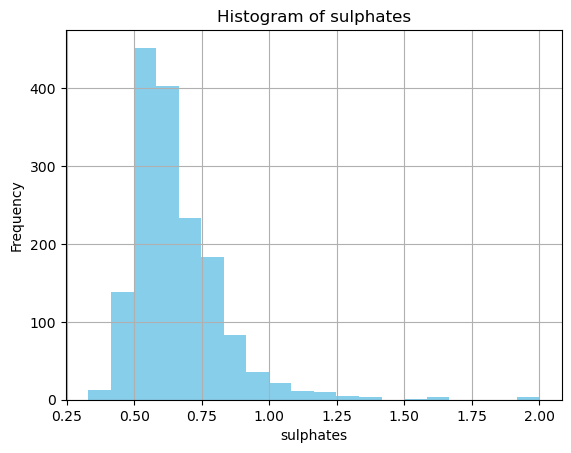

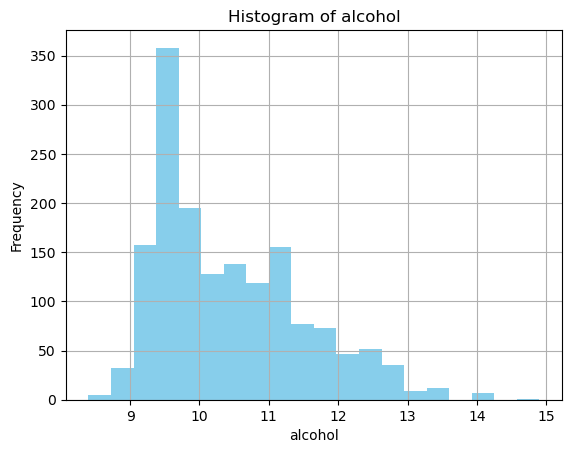

In [11]:
# Create separate histograms for each feature
for feature in numeric_features:
    plt.figure()  # Create a new figure for each feature
    wines[feature].hist(bins=20, color='skyblue')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

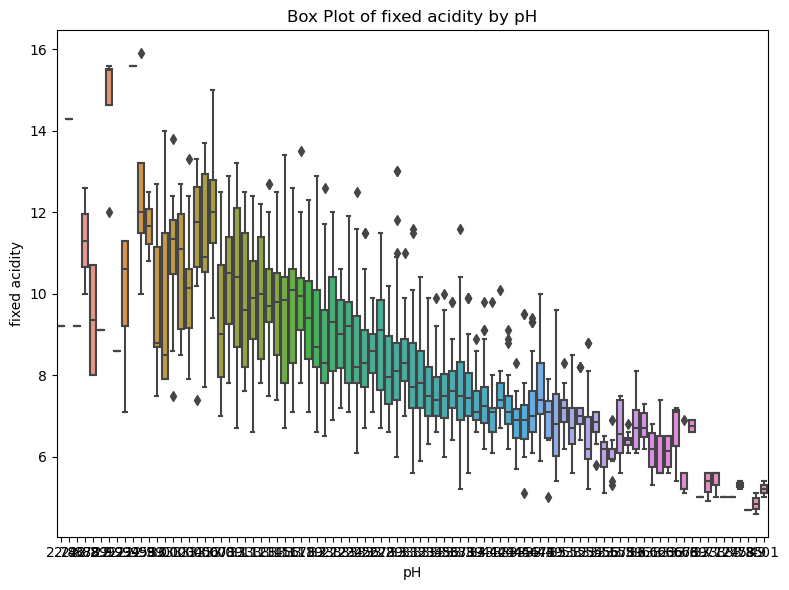

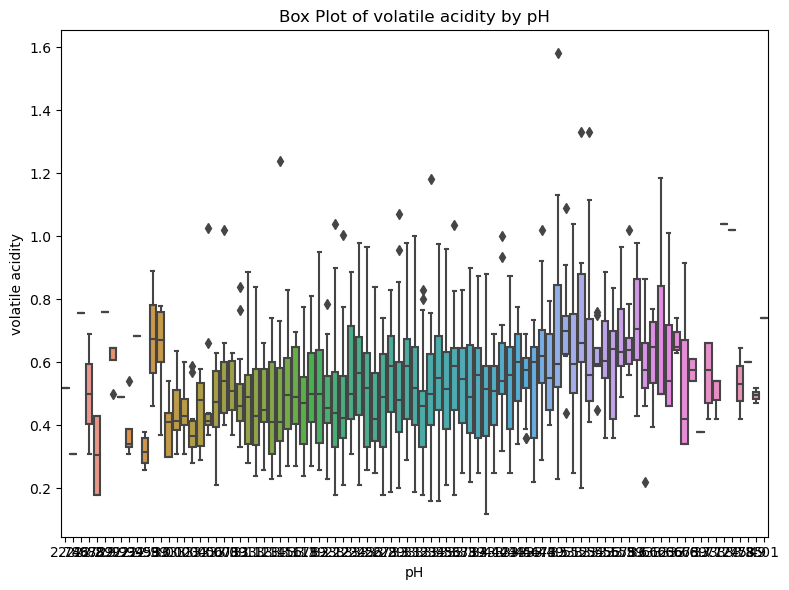

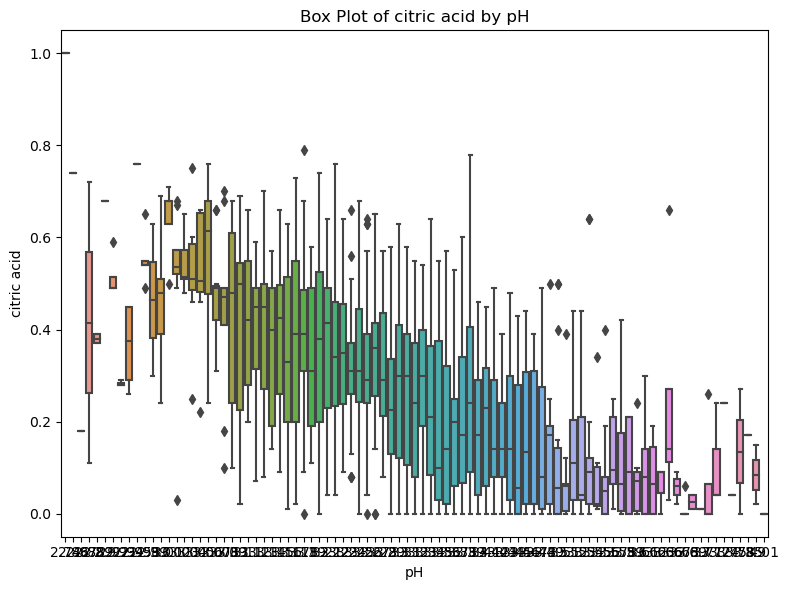

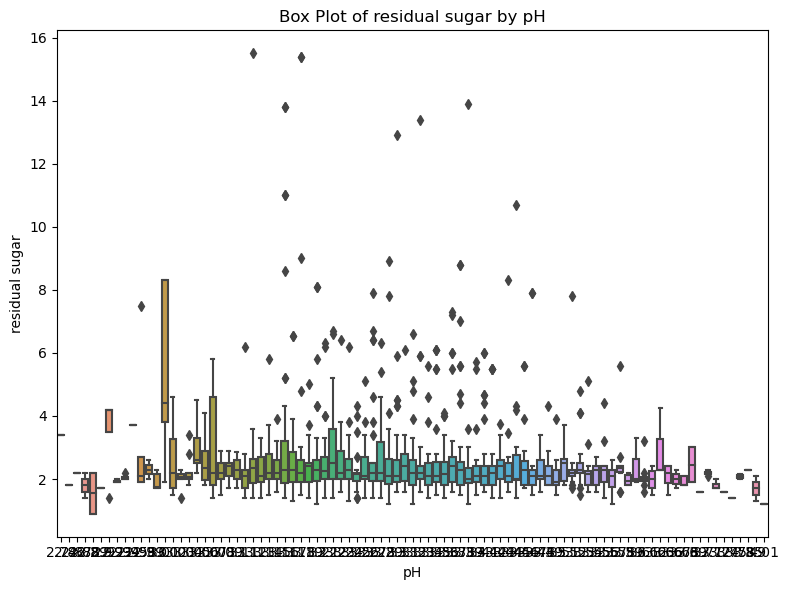

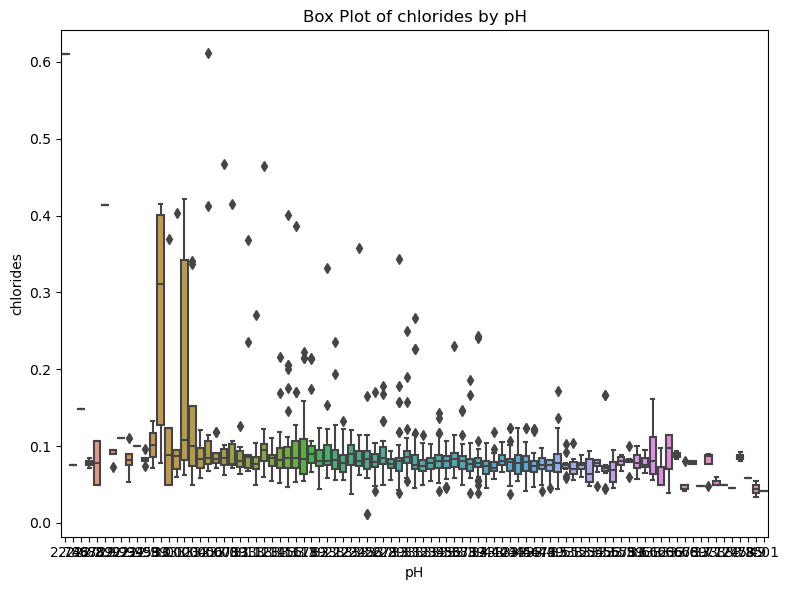

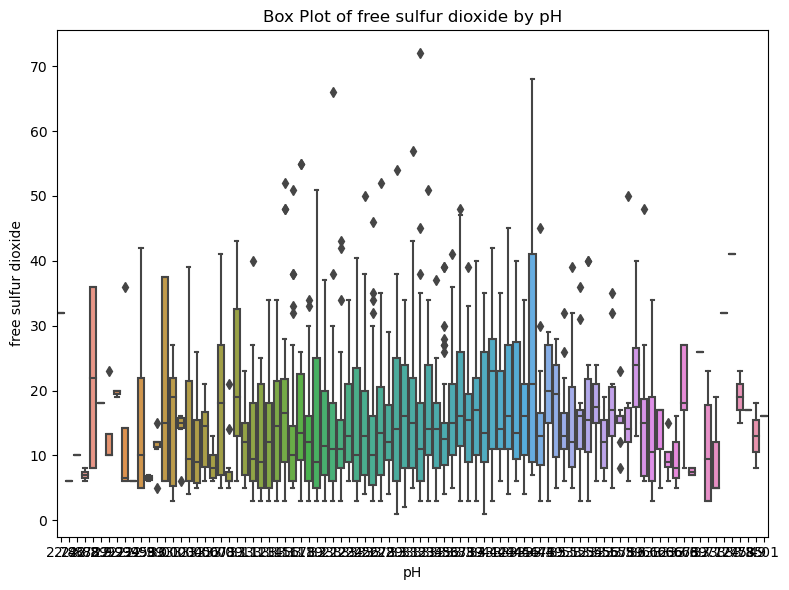

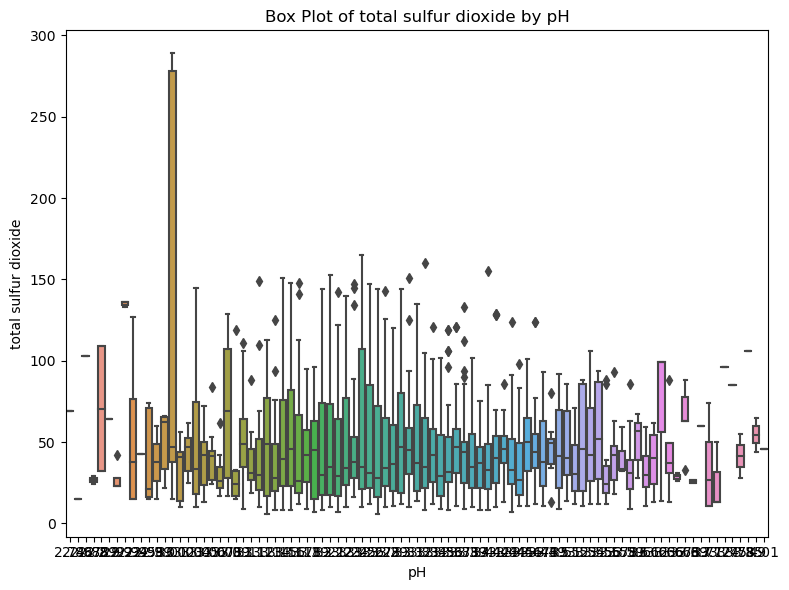

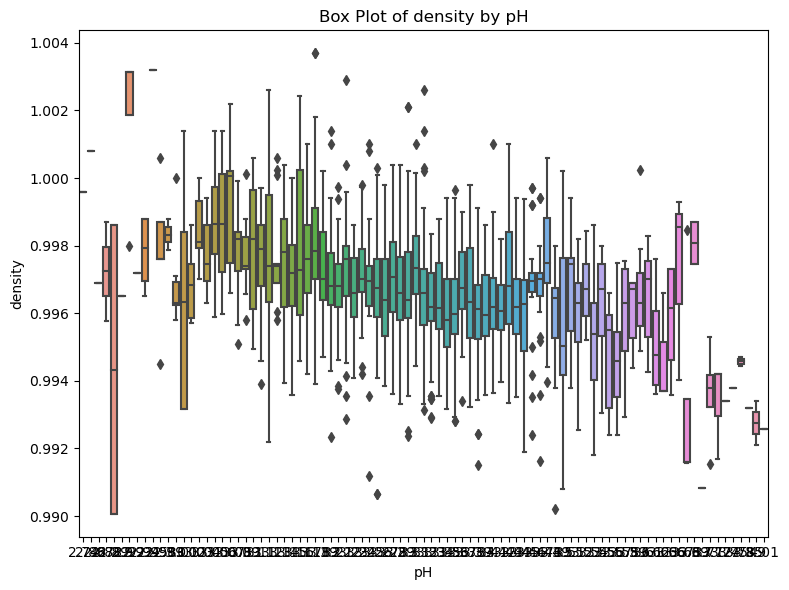

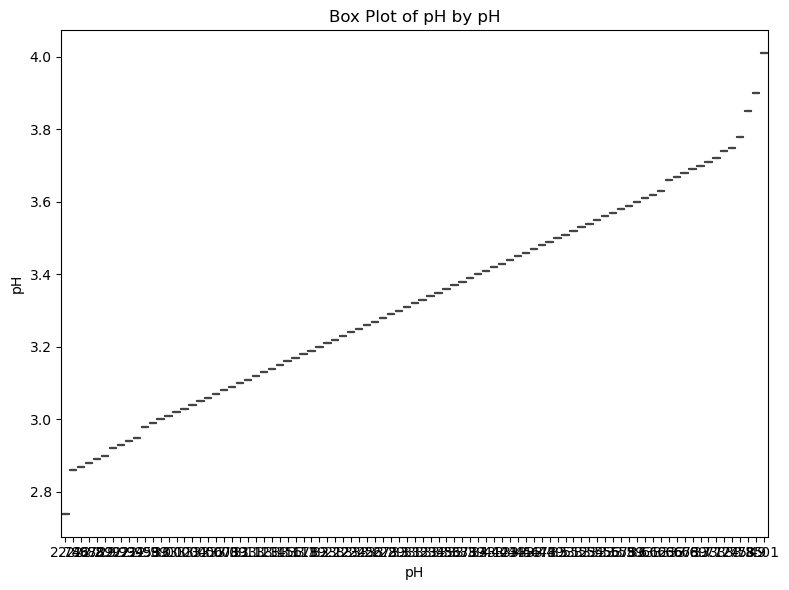

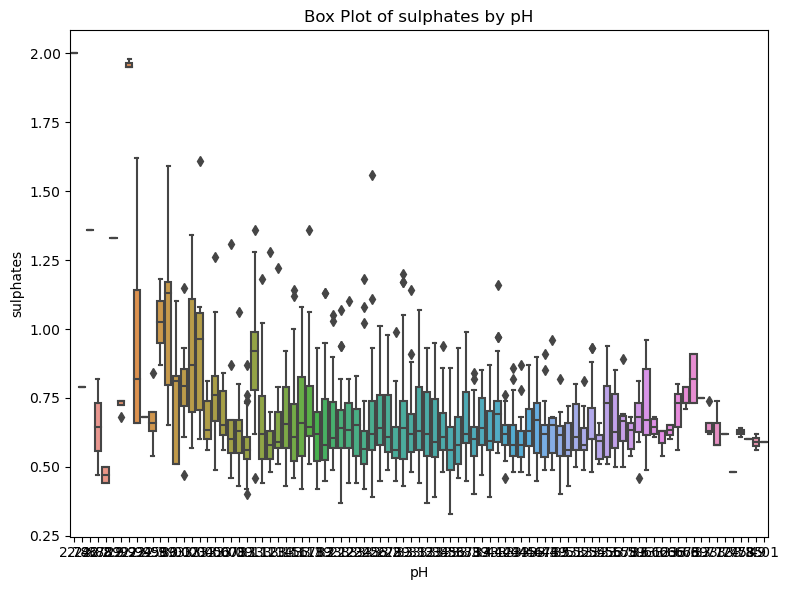

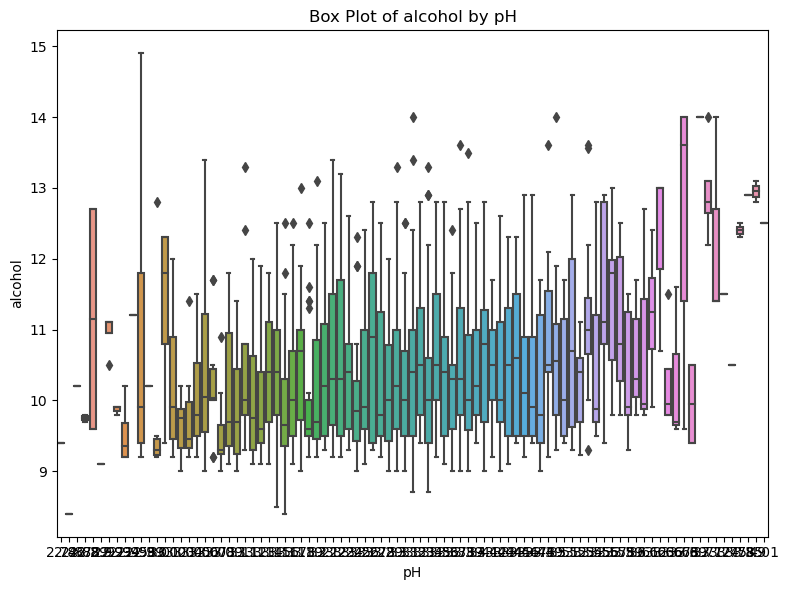

In [12]:
# Create separate box plots for each feature
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='pH', y=feature, data=wines)
    plt.title(f"Box Plot of {feature} by pH")
    plt.xlabel("pH")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

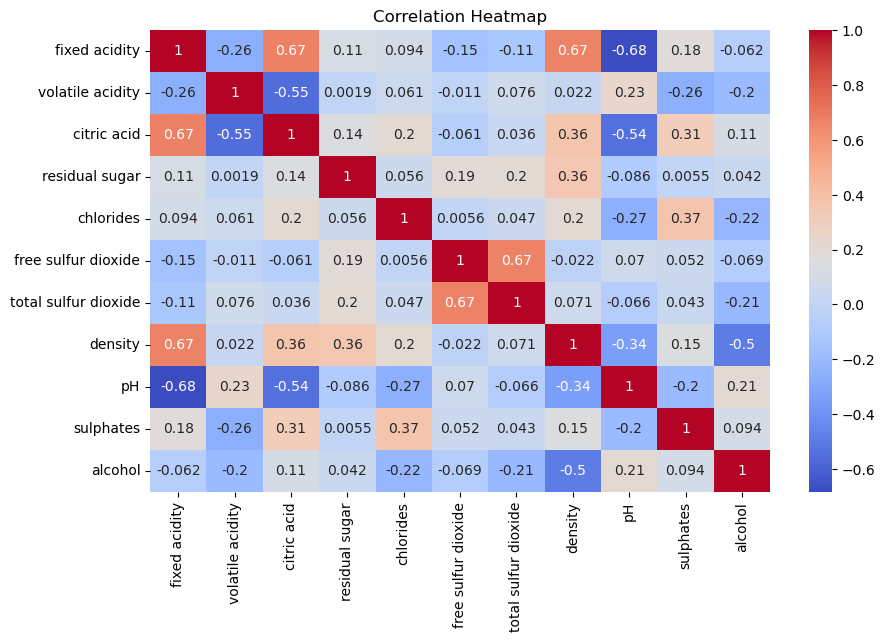

In [13]:
# Correlation Heatmap
correlation_matrix = wines.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

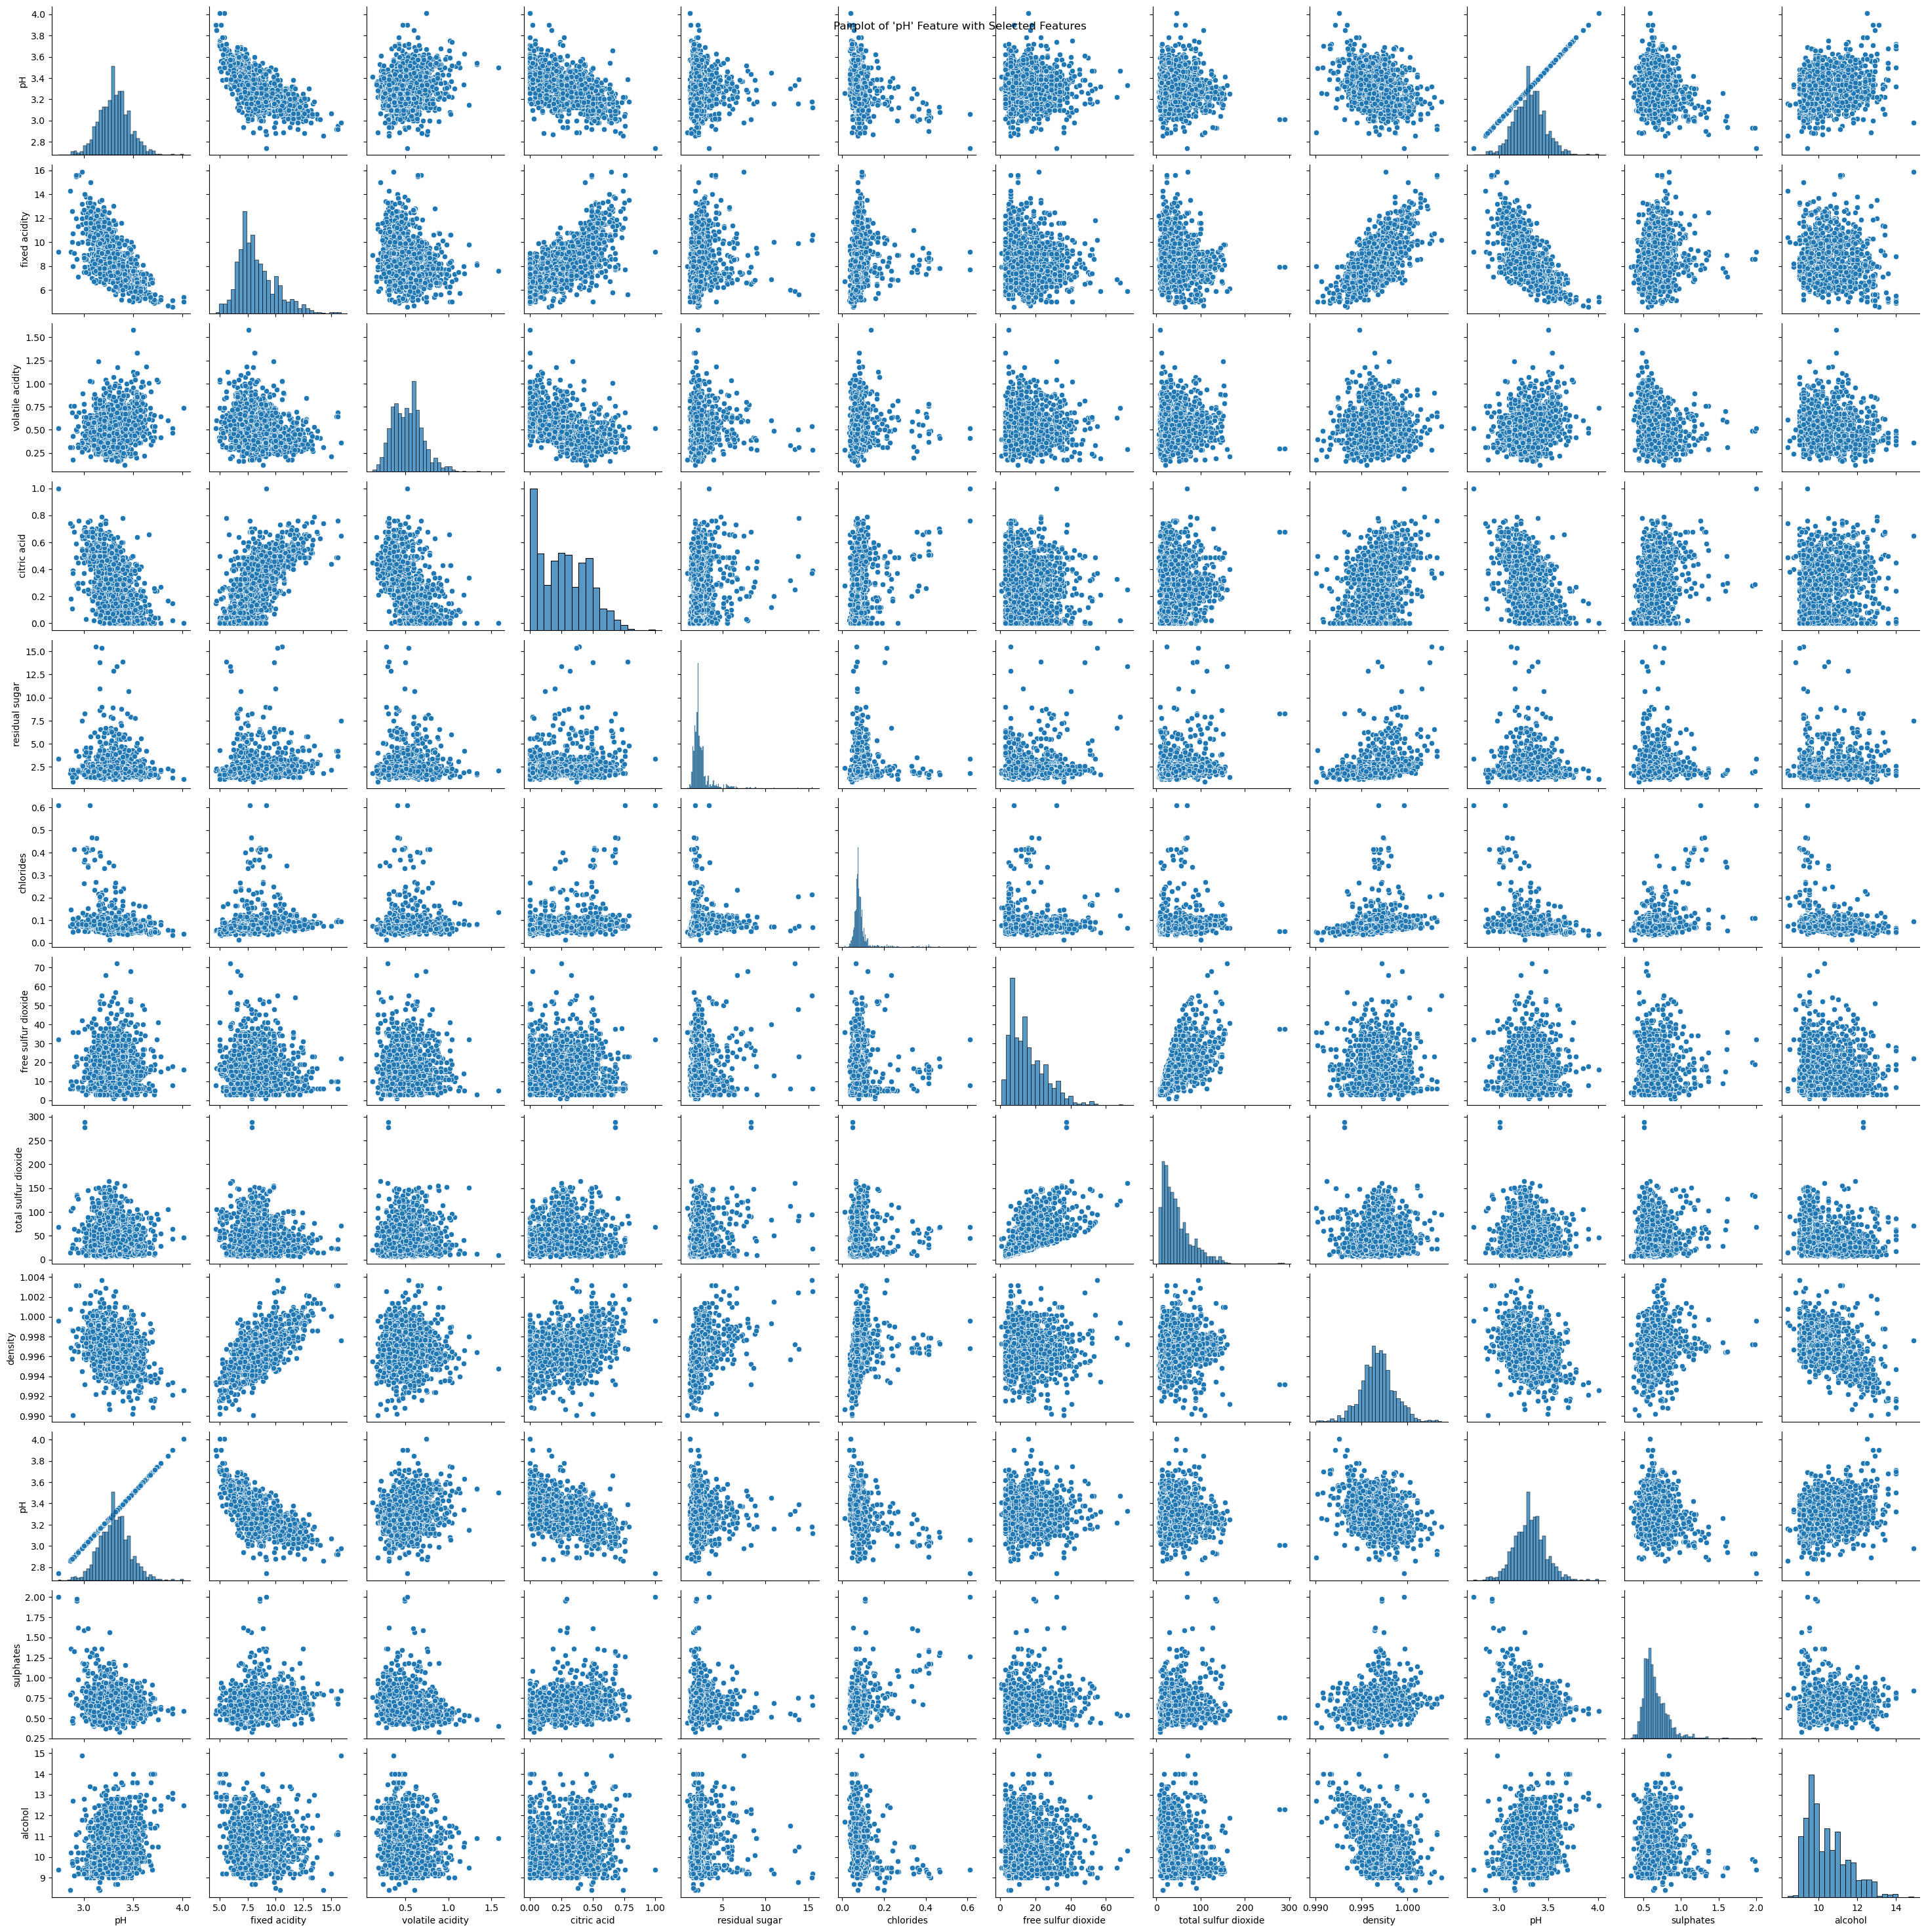

In [14]:
# Create a pairplot for the "pH" feature and select a subset of numeric features to compare
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                    'pH', 'sulphates', 'alcohol']

# Create a pairplot
sns.pairplot(wines, vars=['pH'] + numeric_features)
plt.suptitle("Pairplot of 'pH' Feature with Selected Features")
plt.show()

In [15]:
# Define a function to calculate the weights (coefficients)
def calculate_weights(x_train, y_train):
    step1 = np.linalg.inv(np.dot(np.transpose(x_train), x_train))
    step2 = np.dot(np.transpose(x_train), y_train)
    weights = np.dot(step1, step2)
    return weights

X = wines.drop('pH', axis=1).values
y = wines['pH'].values
X = np.insert(X, 0, 1, axis=1)  # Add a bias term (x0) to X
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

N = 10
correlations = wines.corr()['pH'].abs().sort_values(ascending=False)
top_features = correlations[1:N+1].index
X = wines[top_features].values
X = np.insert(X, 0, 1, axis=1)  # Re-add bias term

train_size = int(0.8 * len(wines))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1279, 11)
y_train shape: (1279,)
X_test shape: (320, 11)
y_test shape: (320,)


C:\Users\Shriganesh Lokapure\AppData\Local\Temp\ipykernel_9268\1282877112.py:13: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std


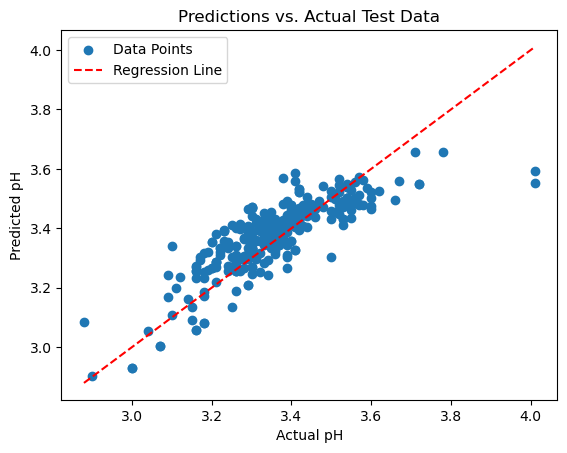

In [16]:
# Calculate the weights using the closed-form solution
weights = calculate_weights(X_train, y_train)

# Calculate the predictions on the testing data
y_pred = np.dot(X_test, weights)

# Calculate the Mean Squared Error (MSE) on the testing data
MSE_test = np.mean((y_pred - y_test) ** 2)

# Calculate the predictions on the training data
y_train_pred = np.dot(X_train, weights)

# Calculate the Mean Squared Error (MSE) on the training data
MSE_train = np.mean((y_train_pred - y_train) ** 2)

# Scatter plot of actual vs. predicted values on the testing data
plt.scatter(y_test, y_pred, label='Data Points')
plt.xlabel("Actual pH")
plt.ylabel("Predicted pH")
plt.title("Predictions vs. Actual Test Data")

# Add a regression line
regression_line = np.linspace(min(y_test), max(y_test), num=len(y_test))
plt.plot(regression_line, regression_line, color='red', linestyle='--', label='Regression Line')

plt.legend()
plt.show()

In [17]:
# Display the final weight vector and MSE values
print("Final Weight Vector (Coefficients):", weights,"\n")
print("Mean Square Error (MSE) on Training Data:", MSE_train,"\n")
print("Mean Square Error (MSE) on Testing Data:", MSE_test,"\n")

Final Weight Vector (Coefficients): [-6.19713269e+01 -9.99916270e-02 -1.89405587e-02  6.57806886e+01
 -5.73092504e-01 -1.50244990e-03  7.00367526e-02 -6.76640163e-02
 -2.76343614e-02  1.85848819e-03 -7.90106164e-04] 

Mean Square Error (MSE) on Training Data: 0.0072297435682638815 

Mean Square Error (MSE) on Testing Data: 0.007144745513775247 

